<a href="https://colab.research.google.com/github/kulivixix/Edu/blob/main/%22Part_1_Intro_to_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План занятия
 - Локальные БД. Работа с библиотекой sqlite3
 - Представление БД с использованием Pandas
 - Удаленные БД. Работа с библиотекой SQLAlchemy

# Введение

База данных может храниться локально, на том же компьютере, на котором запускается прикладное программное обеспечение для работы с базой данных или на удаленном компьютере.

Google Colab (точнее Python, запускаемый в среде Google Colab) позволяет работать и с условно «локальной» базой данных и с базой данных на удаленном сервере. 
- В первом случае может использоваться СУБД **SQLite**, которая будет хранится на облачном диске Google Drive. Для среды Google Colab это будет локальная БД.
- В случае работы с удаленной БД можно использовать **SQLAlchemy**.

Оба модуля **SQLite** и **SQLAlchemy** рассмотрим ниже.

# SQLite

**SQLite** — компактная встраиваемая реляционная база данных. Является чисто реляционной базой данных.

Слово «встраиваемый» означает, что SQLite **не использует парадигму клиент-сервер.** Модуль sqlite3 входит в установочный пакет языка Python, является компонентом стандартной библиотеки и не требует отдельной загрузки и установки.

Pipeline для работы с БД при помощи библиотеки SQLite

``` 
import sqlite3

conn = sqlite3.connect(path)

cursor = conn.cursor()

# Работа с БД
# ...
# ...

cursor.close()
conn.close()
```

## Подключение к базе данных

Для доступа к диску Google Drive сервису Google Colab необходимо дать разрешение на подключение к диску.

Для подключения и разрешения доступа Google Colab к диску Google Drive используем следующий код:

Подключаем модуль для работы с базой SQLite

In [9]:
import sqlite3

Непосредственно модуль sqlite3 – это API к СУБД SQLite. Своего рода адаптер, который переводит команды, написанные на Питоне, в команды, которые понимает SQLite. Как и наоборот, доставляет ответы от SQLite в python-программу.

In [10]:
dir(sqlite3)

['Binary',
 'Cache',
 'Connection',
 'Cursor',
 'DataError',
 'DatabaseError',
 'Date',
 'DateFromTicks',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'OptimizedUnicode',
 'PARSE_COLNAMES',
 'PARSE_DECLTYPES',
 'PrepareProtocol',
 'ProgrammingError',
 'Row',
 'SQLITE_ALTER_TABLE',
 'SQLITE_ANALYZE',
 'SQLITE_ATTACH',
 'SQLITE_CREATE_INDEX',
 'SQLITE_CREATE_TABLE',
 'SQLITE_CREATE_TEMP_INDEX',
 'SQLITE_CREATE_TEMP_TABLE',
 'SQLITE_CREATE_TEMP_TRIGGER',
 'SQLITE_CREATE_TEMP_VIEW',
 'SQLITE_CREATE_TRIGGER',
 'SQLITE_CREATE_VIEW',
 'SQLITE_DELETE',
 'SQLITE_DENY',
 'SQLITE_DETACH',
 'SQLITE_DROP_INDEX',
 'SQLITE_DROP_TABLE',
 'SQLITE_DROP_TEMP_INDEX',
 'SQLITE_DROP_TEMP_TABLE',
 'SQLITE_DROP_TEMP_TRIGGER',
 'SQLITE_DROP_TEMP_VIEW',
 'SQLITE_DROP_TRIGGER',
 'SQLITE_DROP_VIEW',
 'SQLITE_IGNORE',
 'SQLITE_INSERT',
 'SQLITE_OK',
 'SQLITE_PRAGMA',
 'SQLITE_READ',
 'SQLITE_REINDEX',
 'SQLITE_SELECT',
 'SQLITE_TRANSACTION',
 'SQLITE

Создадим папку "my_databases", где будут хранится наши БД

In [11]:
import os
path = "./drive/My Drive/my_databases"
if not os.path.exists(path):
    os.mkdir(path)

In [12]:
os.path.exists(path)

True

Подключаемся к базе test.db. Если этого файла нет в каталоге, то он будет создан.

Вызов функции connect() приводит к созданию объекта-экземпляра от класса Connection. Этот объект обеспечивает связь с файлом базы данных, представляет конкретную БД в программе:

In [13]:
conn = sqlite3.connect(path + '/test.db')
print("Opened database successfully");

Opened database successfully


После того как экземпляр Connection создан, чтобы выполнять SQL-команды, надо создать еще один объект, но теперь уже от класса Cursor. Делается это с помощью метода cursor() объекта типа Connection:

In [14]:
cursor = conn.cursor()

In [15]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS team_data(team text, 
                      country text, 
                      season integer, 
                      total_goals integer);''')

conn.commit()

print("Table created successfully");

#conn.close()

Table created successfully


Заполнять таблицы можно тоже с помощью **execute().**

In [16]:
# INSERTING VALUES

cursor.execute("INSERT INTO team_data VALUES('Real Madrid', 'Spain', 2019, 53);")
cursor.execute("INSERT INTO team_data VALUES('Barcelona', 'Spain', 2019, 47);")

Однако, если требуется вставить несколько записей, лучше воспользоваться методом **executemany():**

In [17]:
sections = [('Arsenal', 'UK', 2019, 52), ('Real Madrid', 'Spain', 2018, 49),
             ('Barcelona', 'Spain', 2018, 45), ('Arsenal', 'UK', 2018, 50 )]
cursor.executemany("INSERT INTO team_data VALUES (?, ?, ?, ?)", sections)

Для того, чтобы корректно завершить работу с базой данных, надо применить изменения (выполнить транзакцию) **commit()** и разорвать соединение **close()**. Обратите внимание, это делается по отношению к экземпляру Connection, а не Cursor:

In [18]:
conn.commit()
conn.close()

In [19]:
# Average goal by team

conn = sqlite3.connect(path + '/test.db')
# Создаем объект типа cursor для доступа к данным
cursor = conn.cursor()

#Запрос данных из таблицы 
sql  = '''SELECT team, total_goals FROM team_data'''

cursor.execute(sql)

for row in cursor:
    print(row)

('Real Madrid', 53)
('Barcelona', 47)
('Arsenal', 52)
('Real Madrid', 49)
('Barcelona', 45)
('Arsenal', 50)


In [20]:
#Запрос данных из таблицы 
sql  = ''' SELECT team, AVG(total_goals) FROM team_data'''

cursor.execute(sql)

for row in cursor:
    print(row)

('Arsenal', 49.333333333333336)


Почему на выходе получили только 1 комманду?

In [21]:
sql  = ''' SELECT team, AVG(total_goals) AS avg_goals FROM team_data GROUP BY team;'''
cursor.execute(sql)

for row in cursor:
  print(row)

('Arsenal', 51.0)
('Barcelona', 46.0)
('Real Madrid', 51.0)


In [22]:
cursor.close()
conn.close()

In [23]:
# First try to filter the teams with average goals higher than 50
# This query will generate an error

conn = sqlite3.connect(path + '/test.db')
cursor = conn.cursor()

sql = ''' SELECT team AS team_name,
                            AVG(total_goals) AS avg_goals
                          FROM team_data
                          GROUP BY team 
                          HAVING AVG(total_goals) > 50;'''
                          
cursor.execute(sql)

for row in cursor:
  print(row)
conn.close()

('Arsenal', 51.0)
('Real Madrid', 51.0)


In [24]:
# Now, the correct query, using the appropriate sub-query

conn = sqlite3.connect(path + '/test.db')

cursor = conn.cursor()

sql = ''' SELECT team_name, avg_goals
                          FROM (

                          -- Here we make our sub-query:
                            SELECT team AS team_name,
                            AVG(total_goals) AS avg_goals
                            FROM team_data
                            GROUP BY team) tp
                          -- End of the sub-query
                          
                          WHERE avg_goals > 50;'''

cursor.execute(sql)

for row in cursor:
  print(row)
conn.close()

('Arsenal', 51.0)
('Real Madrid', 51.0)


Для наглядного представления табличных данных можно использовать библиотеку pandas:

In [25]:
import pandas as pd


conn = sqlite3.connect(path + '/test.db')
cursor = conn.cursor()

#sql  = '''SELECT team, total_goals AS avg_goals FROM team_data GROUP BY team;'''
sql  = '''SELECT team, total_goals FROM team_data;'''
                          
cursor.execute(sql)

# Загружаем все результаты в список списков rows 
rows = cursor.fetchall()

In [26]:
rows

[('Real Madrid', 53),
 ('Barcelona', 47),
 ('Arsenal', 52),
 ('Real Madrid', 49),
 ('Barcelona', 45),
 ('Arsenal', 50)]

In [27]:
pd.DataFrame(rows, columns=('Team', 'Goals') )

,Team,Goals
0,Real Madrid,53
1,Barcelona,47
2,Arsenal,52
3,Real Madrid,49
4,Barcelona,45
5,Arsenal,50


In [28]:
sql  = '''SELECT team, total_goals AS avg_goals FROM team_data GROUP BY team;'''
                          
cursor.execute(sql)

# Загружаем все результаты в список списков rows 
rows = cursor.fetchall()

pd.DataFrame(rows, columns=('Team', 'Goals'))

,Team,Goals
0,Arsenal,50
1,Barcelona,45
2,Real Madrid,49


In [29]:
cursor.close()
conn.close()

<center><img src='https://raw.githubusercontent.com/ddvika/Data-Science-School-2020/main/lecture_5/imgs/typical_sql.tiff' height = 550></center>

# SQLAlchemy

**ORM** расшифровывается как object-relational mapping,  или объектно-реляционное отображение — подход к работе с базами данных, использующий  концепции объектно-ориентированных языков программирования.   Объектно-реляционное отображение позволяет оперировать объектами в коде, что гораздо удобнее, чем работать с запросами и таблицами.


Иными словами, можно обращаться к объектам классов для управления данными в таблицах БД. Также можно создавать, изменять, удалять, фильтровать и, самое главное, наследовать объекты классов, сопоставленные с таблицами БД, что существенно сокращает наполнение кодовой базы.

**SQLAlchemy** — это библиотека на языке Python для работы с реляционными СУБД с применением технологии ORM. Служит для синхронизации объектов Python и записей реляционной базы данных. SQLAlchemy позволяет описывать структуры баз данных и способы взаимодействия с ними на языке Python без использования SQL.

### Создадим новую базу данных с нуля
Давайте создадим новую базу данных с нуля, для этого:
1. Создадим классы для определения схемы.
2. Сопоставим схему с базой данных.
3. Добавим объекты в базу данных
4. Напишем запросы

### 1. Запустим database session

In [30]:
from sqlalchemy import create_engine
#engine = create_engine('sqlite:///example.db', echo=True)
engine = create_engine('sqlite:///:memory:', echo=True)
#engine = create_engine('sqlite:///:memory:')
conn = engine.connect()

from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

2020-12-14 19:26:47,106 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-14 19:26:47,107 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:26:47,112 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-14 19:26:47,115 INFO sqlalchemy.engine.base.Engine ()


В случае если мы хоти подкоючится к удаленной БД, код будет выглядить примерно так:

```
def connect_to_db(uid):
    # создаем объект подключения
    sql = create_engine(
        f'mysql+mysqlconnector://user{uid}:userpassword{uid}'   # LOGIN, PASSWORD
        f'@157.230.109.1/classicmodels_user_{uid}',             # HOST IP
        pool_recycle=60
    )
    connection = sql.connect()
    return connection
    # отправка комманд без чтения/записи (например удаление) в самом конце

connection = connect_to_db(uid=5)
connection
```

### 2. Вспомогательные функции для печати и вывода результатов SQL запросов

In [31]:
from IPython.display import display
import pandas as pd
import sqlalchemy

def sql(query):
    print()
    print(query)
    print()

def get_results(query):
    global engine
    q = query.statement if isinstance(query, sqlalchemy.orm.query.Query) else query
    return pd.read_sql(q, engine)

def display_results(query):
    df = get_results(query)
    display(df)
    #sql(query)

### 3. Инициализация схемы БД

Схема - это пространство имен, которое содержит именованные объекты базы данных, такие как таблицы, представления, индексы, типы данных

In [32]:
!pip install sqlalchemy_explore

  Created wheel for sqlalchemy-explore: filename=sqlalchemy_explore-0.1.2-cp36-none-any.whl size=4543 sha256=85dd00b21b3ec6a44e2946a9058e011fc694b0503e1fb21d559f7868f26da510
  Stored in directory: /root/.cache/pip/wheels/af/7d/67/1c55901ebff236da60829800b9a2ebfa8b52c455db565a1acd
Successfully built sqlalchemy-explore


In [33]:
from sqlalchemy.ext.declarative import declarative_base
import sqlalchemy_explore

### the basic base class for SQLAlchemy schema objects
# Base = declarative_base(bind=engine)

### base class including utils like an __repr__ method
### see https://pypi.org/project/sqlalchemy-explore/
Base = declarative_base(cls=sqlalchemy_explore.ReflectiveMixin)

### Создание самой схемы

In [34]:
from sqlalchemy import Column, DateTime, ForeignKey, Integer, NVARCHAR, Numeric, Sequence
from sqlalchemy.orm import relationship

class Customer(Base):
    __tablename__ = 'customers'

    CustomerId = Column(Integer, Sequence('customer_id_seq'), primary_key=True)
    FirstName = Column(NVARCHAR(40), nullable=False)
    LastName = Column(NVARCHAR(20), nullable=False)
    Company = Column(NVARCHAR(80))
    Address = Column(NVARCHAR(70))
    Phone = Column(NVARCHAR(24))
    Email = Column(NVARCHAR(60), nullable=False)
    
class Item(Base):
    __tablename__ = 'items'
    
    ItemId = Column(Integer, Sequence('item_id_seq'), primary_key=True)
    Name = Column(NVARCHAR(40), nullable=False)
    Price = Column(Numeric, nullable=False)

class Purchase(Base):
    __tablename__ = 'purchases'
    
    PurchaseId = Column(Integer, Sequence('purchase_id_seq'), primary_key=True)
    ItemId = Column(ForeignKey('items.ItemId'), nullable=False, index=True)
    CustomerId = Column(ForeignKey('customers.CustomerId'), nullable=False, index=True)
    Date = Column(DateTime, nullable=False)
    
    item = relationship('Item')
    customer = relationship('Customer')

In [35]:
Purchase.ItemId.name

'ItemId'

In [36]:
Purchase.CustomerId.name

'CustomerId'

### 5. Создадим таблицы в базе данных в соответствии со схемой

In [37]:
Base.metadata.create_all(engine)

2020-12-14 19:27:08,986 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("customers")
2020-12-14 19:27:08,988 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:08,994 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("customers")
2020-12-14 19:27:08,996 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:09,001 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("items")
2020-12-14 19:27:09,002 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:09,004 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("items")
2020-12-14 19:27:09,007 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:09,009 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("purchases")
2020-12-14 19:27:09,010 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:09,011 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("purchases")
2020-12-14 19:27:09,013 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:09,015 INFO sqlalchemy.engine.base.Engine 
CREATE

In [38]:
engine.table_names()

2020-12-14 19:27:10,577 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-14 19:27:10,578 INFO sqlalchemy.engine.base.Engine ()


['customers', 'items', 'purchases']

### 6. Создадим покупателя

In [39]:
moshe = Customer(
    FirstName='Moshe', 
    LastName='Cohen', 
    Address='Alenbi 99, Tel Aviv', 
    Phone="053-5556789", 
    Email='moshe@cohen.com')

session.add(moshe)
session.commit()

2020-12-14 19:27:12,433 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-14 19:27:12,436 INFO sqlalchemy.engine.base.Engine INSERT INTO customers ("FirstName", "LastName", "Company", "Address", "Phone", "Email") VALUES (?, ?, ?, ?, ?, ?)
2020-12-14 19:27:12,437 INFO sqlalchemy.engine.base.Engine ('Moshe', 'Cohen', None, 'Alenbi 99, Tel Aviv', '053-5556789', 'moshe@cohen.com')
2020-12-14 19:27:12,440 INFO sqlalchemy.engine.base.Engine COMMIT


### 7. Выполним запрос

Используя язык выражений SQLAchemy

In [40]:
from sqlalchemy import select 

customers_query = select([Customer.FirstName, Customer.LastName, Customer.Email])
results = conn.execute(customers_query)

print()
for row in results:
    print(row)

print()
print(type(row)) # rows are of type sqlalchemy.engine.result.RowProxy

2020-12-14 19:27:14,904 INFO sqlalchemy.engine.base.Engine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers
2020-12-14 19:27:14,907 INFO sqlalchemy.engine.base.Engine ()

('Moshe', 'Cohen', 'moshe@cohen.com')

<class 'sqlalchemy.engine.result.RowProxy'>


In [41]:
display_results(customers_query)

2020-12-14 19:27:16,419 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers
2020-12-14 19:27:16,421 INFO sqlalchemy.engine.base.OptionEngine ()


,FirstName,LastName,Email
0,Moshe,Cohen,moshe@cohen.com


### 8. Добавим еще покупателей

In [42]:
Lisa = Customer(
    FirstName='Lisa',
    LastName='Cohen', 
    Address='Alenbi 99, Tel Aviv', 
    Phone="052-1234565", 
    Email='lisa@cohen.com')

session.add(Lisa)
session.commit()

2020-12-14 19:27:19,040 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-14 19:27:19,042 INFO sqlalchemy.engine.base.Engine INSERT INTO customers ("FirstName", "LastName", "Company", "Address", "Phone", "Email") VALUES (?, ?, ?, ?, ?, ?)
2020-12-14 19:27:19,043 INFO sqlalchemy.engine.base.Engine ('Lisa', 'Cohen', None, 'Alenbi 99, Tel Aviv', '052-1234565', 'lisa@cohen.com')
2020-12-14 19:27:19,044 INFO sqlalchemy.engine.base.Engine COMMIT


In [43]:
Nika = Customer(
    FirstName='Nika', 
    LastName='Rave', 
    Address='Green st, LA', 
    Phone="330-1234565", 
    Email='Nika@rave.com')

session.add(Nika)
session.commit()

2020-12-14 19:27:19,753 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-14 19:27:19,755 INFO sqlalchemy.engine.base.Engine INSERT INTO customers ("FirstName", "LastName", "Company", "Address", "Phone", "Email") VALUES (?, ?, ?, ?, ?, ?)
2020-12-14 19:27:19,757 INFO sqlalchemy.engine.base.Engine ('Nika', 'Rave', None, 'Green st, LA', '330-1234565', 'Nika@rave.com')
2020-12-14 19:27:19,759 INFO sqlalchemy.engine.base.Engine COMMIT


In [44]:
Lisa_2 = Customer(
    FirstName='Lisa',
    LastName='White', 
    Address='Alenbi 66, Tel Aviv', 
    Phone="062-1234565", 
    Email='lisa@White.com')

session.add(Lisa_2)
session.commit()

2020-12-14 19:27:21,090 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-14 19:27:21,093 INFO sqlalchemy.engine.base.Engine INSERT INTO customers ("FirstName", "LastName", "Company", "Address", "Phone", "Email") VALUES (?, ?, ?, ?, ?, ?)
2020-12-14 19:27:21,096 INFO sqlalchemy.engine.base.Engine ('Lisa', 'White', None, 'Alenbi 66, Tel Aviv', '062-1234565', 'lisa@White.com')
2020-12-14 19:27:21,097 INFO sqlalchemy.engine.base.Engine COMMIT


Посмотрим теперь на таблицу:

In [45]:
customers_query = select([Customer.FirstName, Customer.Email])
display_results(customers_query)

2020-12-14 19:27:23,468 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."Email" 
FROM customers
2020-12-14 19:27:23,470 INFO sqlalchemy.engine.base.OptionEngine ()


,FirstName,Email
0,Moshe,moshe@cohen.com
1,Lisa,lisa@cohen.com
2,Nika,Nika@rave.com
3,Lisa,lisa@White.com


In [46]:
Customer.__dict__

mappingproxy({'Address': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec468>,
              'Company': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec4c0>,
              'CustomerId': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec2b0>,
              'Email': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec3b8>,
              'FirstName': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec570>,
              'LastName': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec518>,
              'Phone': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7fcf78dec1a8>,
              '__doc__': None,
              '__init__': <function __init__>,
              '__mapper__': <Mapper at 0x7fcf5ce219e8; Customer>,
              '__module__': '__main__',
              '__table__': Table('customers', MetaData(bind=None), Column('CustomerId', Integer(), table=<customers>, primary_key=True, nullable=False, defa

In [47]:
list_info = session.query(Customer).all()

2020-12-14 19:27:26,121 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-14 19:27:26,124 INFO sqlalchemy.engine.base.Engine SELECT customers."CustomerId" AS "customers_CustomerId", customers."FirstName" AS "customers_FirstName", customers."LastName" AS "customers_LastName", customers."Company" AS "customers_Company", customers."Address" AS "customers_Address", customers."Phone" AS "customers_Phone", customers."Email" AS "customers_Email" 
FROM customers
2020-12-14 19:27:26,125 INFO sqlalchemy.engine.base.Engine ()


In [48]:
list_info

[Customer(CustomerId=1, FirstName='Moshe', LastName='Cohen', Company=None, Address='Alenbi 99, Tel Aviv', Phone='053-5556789', Email='moshe@cohen.com'),
 Customer(CustomerId=2, FirstName='Lisa', LastName='Cohen', Company=None, Address='Alenbi 99, Tel Aviv', Phone='052-1234565', Email='lisa@cohen.com'),
 Customer(CustomerId=3, FirstName='Nika', LastName='Rave', Company=None, Address='Green st, LA', Phone='330-1234565', Email='Nika@rave.com'),
 Customer(CustomerId=4, FirstName='Lisa', LastName='White', Company=None, Address='Alenbi 66, Tel Aviv', Phone='062-1234565', Email='lisa@White.com')]

In [49]:
for id_ in list_info:
    print(id_.CustomerId)

1
2
3
4


In [50]:
first_info = session.query(Customer.CustomerId)

In [51]:
first_info

Операторы **desc**, **asc**, **order_by**

Оператор SQL ORDER BY выполняет сортировку выходных значений. Оператор SQL ORDER BY можно применять как к числовым столбцам, так и к строковым. В последнем случае, сортировка будет происходить по алфавиту.

`ORDER BY column_name [ASC | DESC]`

ASC - по возрастанию, DESC - по убыванию

In [52]:
from sqlalchemy import *

In [53]:
from sqlalchemy import desc, asc

customers_query = select([Customer.FirstName, Customer.LastName, Customer.Email]).order_by(asc(Customer.FirstName), desc(Customer.LastName))
#customers_query = customers_query.order_by(asc(Customer.FirstName))

display_results(customers_query)

2020-12-14 19:27:35,461 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers ORDER BY customers."FirstName" ASC, customers."LastName" DESC
2020-12-14 19:27:35,463 INFO sqlalchemy.engine.base.OptionEngine ()


,FirstName,LastName,Email
0,Lisa,White,lisa@White.com
1,Lisa,Cohen,lisa@cohen.com
2,Moshe,Cohen,moshe@cohen.com
3,Nika,Rave,Nika@rave.com


In [54]:
customers_query = customers_query.order_by(desc(Customer.FirstName))

display_results(customers_query)

2020-12-14 19:27:36,586 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers ORDER BY customers."FirstName" ASC, customers."LastName" DESC, customers."FirstName" DESC
2020-12-14 19:27:36,589 INFO sqlalchemy.engine.base.OptionEngine ()


,FirstName,LastName,Email
0,Lisa,White,lisa@White.com
1,Lisa,Cohen,lisa@cohen.com
2,Moshe,Cohen,moshe@cohen.com
3,Nika,Rave,Nika@rave.com


**where**
Оператор SQL WHERE служит для задания дополнительного условия выборки, операций вставки, редактирования и удаления записей.

`where condition`

In [55]:
customers_query = select([Customer.FirstName, Customer.LastName, Customer.Email])
customers_query = customers_query.where(Customer.FirstName == 'Lisa')

display_results(customers_query)

2020-12-14 19:27:39,570 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers 
WHERE customers."FirstName" = ?
2020-12-14 19:27:39,571 INFO sqlalchemy.engine.base.OptionEngine ('Lisa',)


,FirstName,LastName,Email
0,Lisa,Cohen,lisa@cohen.com
1,Lisa,White,lisa@White.com


In [56]:
customers_query = select([Customer.FirstName, Customer.LastName, Customer.Email])
customers_query = customers_query.where(Customer.FirstName == 'Lisa').order_by(asc(Customer.LastName))

In [57]:
display_results(customers_query)

2020-12-14 19:27:42,304 INFO sqlalchemy.engine.base.OptionEngine SELECT customers."FirstName", customers."LastName", customers."Email" 
FROM customers 
WHERE customers."FirstName" = ? ORDER BY customers."LastName" ASC
2020-12-14 19:27:42,306 INFO sqlalchemy.engine.base.OptionEngine ('Lisa',)


,FirstName,LastName,Email
0,Lisa,Cohen,lisa@cohen.com
1,Lisa,White,lisa@White.com


Документация по операторам в SQLAchemy:

https://docs.sqlalchemy.org/en/13/core/sqlelement.html

## SQLAchemy + Pandas

In [58]:
import pandas as pd

In [59]:
#выведем название нашей таблицы
Item.__tablename__

'items'

In [60]:
df = pd.read_sql('SELECT * FROM customers', conn)
df.tail()

2020-12-14 19:27:47,499 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM customers")
2020-12-14 19:27:47,501 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:47,502 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM customers")
2020-12-14 19:27:47,504 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:47,505 INFO sqlalchemy.engine.base.Engine SELECT * FROM customers
2020-12-14 19:27:47,507 INFO sqlalchemy.engine.base.Engine ()


,CustomerId,FirstName,LastName,Company,Address,Phone,Email
0,1,Moshe,Cohen,None,"Alenbi 99, Tel Aviv",053-5556789,moshe@cohen.com
1,2,Lisa,Cohen,None,"Alenbi 99, Tel Aviv",052-1234565,lisa@cohen.com
2,3,Nika,Rave,None,"Green st, LA",330-1234565,Nika@rave.com
3,4,Lisa,White,None,"Alenbi 66, Tel Aviv",062-1234565,lisa@White.com


In [61]:
# Если хотим получить отсортированные значения - ключевая команда ORDER BY
sql = """
SELECT 
    *
FROM
    customers
ORDER BY 
    LastName ASC;
"""
df = pd.read_sql(sql, conn)

df.head()

2020-12-14 19:27:48,661 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("
SELECT 
    *
FROM
    customers
ORDER BY 
    LastName ASC;
")
2020-12-14 19:27:48,662 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:48,664 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("
SELECT 
    *
FROM
    customers
ORDER BY 
    LastName ASC;
")
2020-12-14 19:27:48,665 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:48,666 INFO sqlalchemy.engine.base.Engine 
SELECT 
    *
FROM
    customers
ORDER BY 
    LastName ASC;

2020-12-14 19:27:48,668 INFO sqlalchemy.engine.base.Engine ()


,CustomerId,FirstName,LastName,Company,Address,Phone,Email
0,1,Moshe,Cohen,None,"Alenbi 99, Tel Aviv",053-5556789,moshe@cohen.com
1,2,Lisa,Cohen,None,"Alenbi 99, Tel Aviv",052-1234565,lisa@cohen.com
2,3,Nika,Rave,None,"Green st, LA",330-1234565,Nika@rave.com
3,4,Lisa,White,None,"Alenbi 66, Tel Aviv",062-1234565,lisa@White.com


In [62]:
# Если хотим получить уникальные значения - ключевая команда DISTINCT
df = pd.read_sql("""
SELECT 
    DISTINCT LastName
FROM
    customers
ORDER BY 
    LastName;
""", conn)

df.head()

2020-12-14 19:27:50,165 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("
SELECT 
    DISTINCT LastName
FROM
    customers
ORDER BY 
    LastName;
")
2020-12-14 19:27:50,166 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:50,167 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("
SELECT 
    DISTINCT LastName
FROM
    customers
ORDER BY 
    LastName;
")
2020-12-14 19:27:50,168 INFO sqlalchemy.engine.base.Engine ()
2020-12-14 19:27:50,169 INFO sqlalchemy.engine.base.Engine 
SELECT 
    DISTINCT LastName
FROM
    customers
ORDER BY 
    LastName;

2020-12-14 19:27:50,170 INFO sqlalchemy.engine.base.Engine ()


,LastName
0,Cohen
1,Rave
2,White


# ДЗ
 Дедлайн **15.12.2020, 23:59**
  
- Решить первые 20 задач с сайта https://www.sql-ex.ru (Раздел SELECT(обучающий этап)). Оценивается пропорционально кол-ву выполненных задач. + 20 % (еще 15 задач)

- Дополнить таблицу 'items' и 'purchases' 5ью экземплярами (каждую) на Ваш Выбор. Важно: они должны быть привязаны к существующим покупателям Lisa, Nika, Moshe.
- При помощи запроса SQLAlchemy вывести все покупки Lisa. Вывести тоже самое при помощи Pandas.

____________________________________________________________________________________________________________________________________________________________

Задание 1: Решить первые 20 задач с сайта https://www.sql-ex.ru (Раздел SELECT(обучающий этап)). Оценивается пропорционально кол-ву выполненных задач. + 20 % (еще 15 задач)

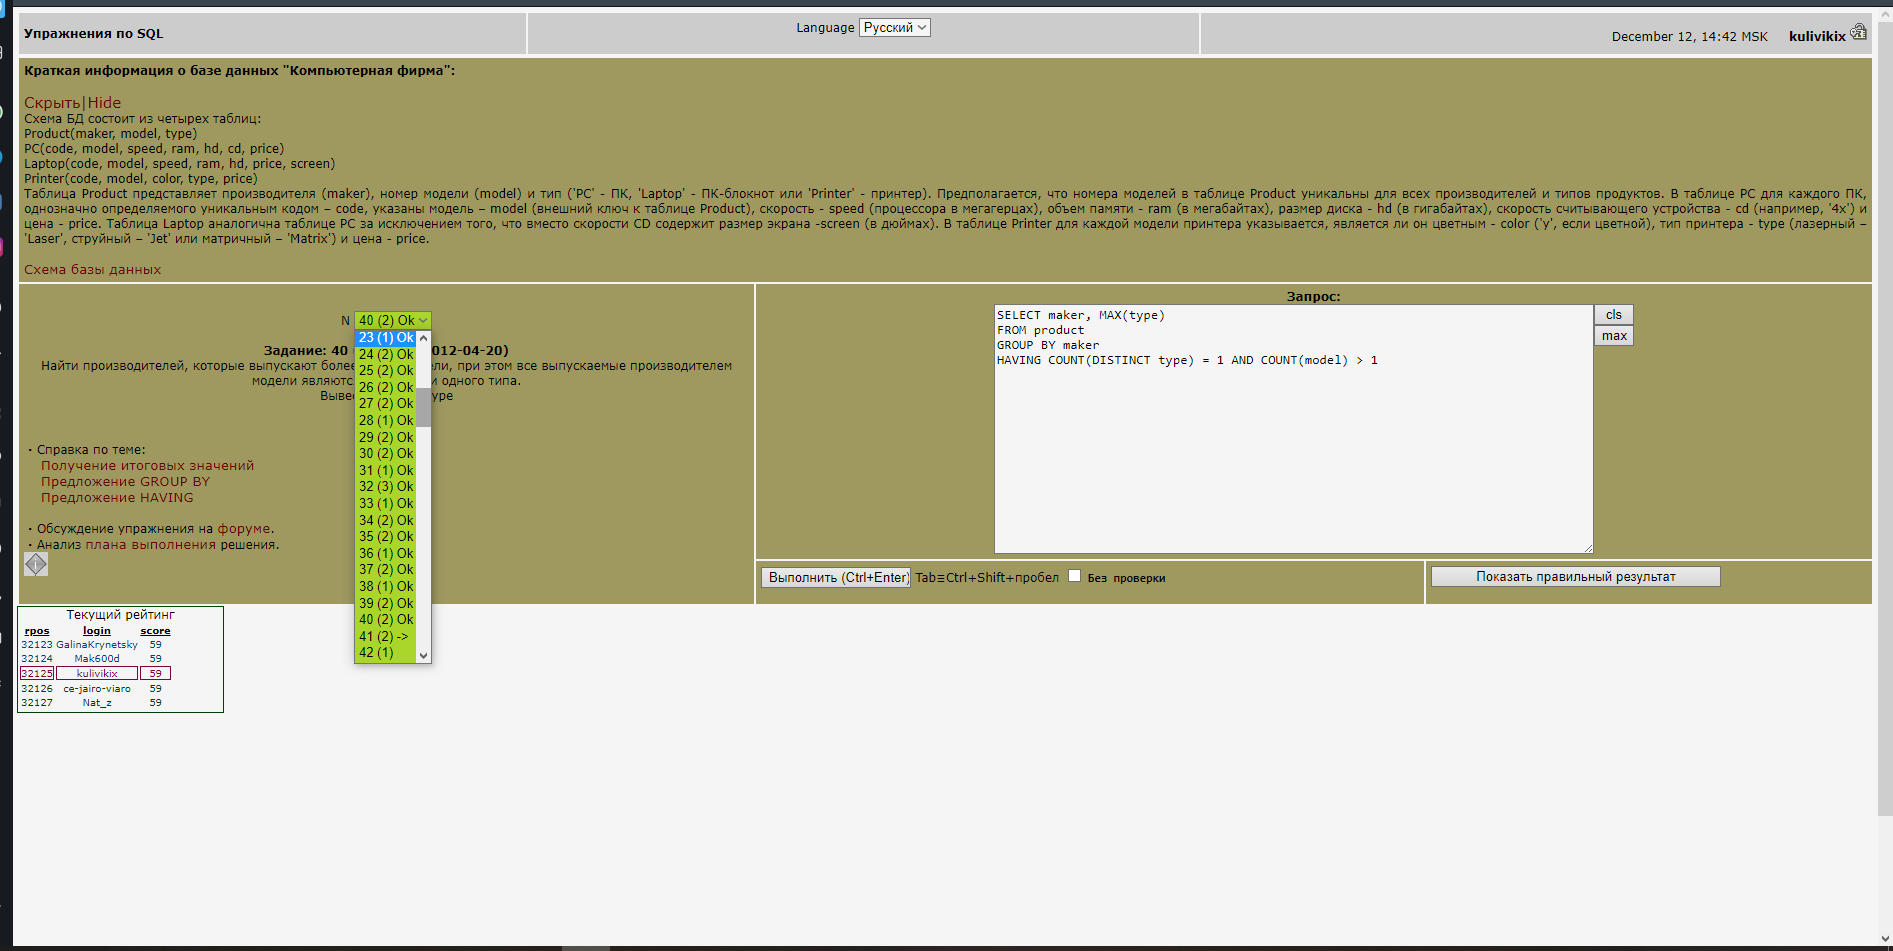